In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import shapiro, wilcoxon

##### Read the data file

In [2]:
latencies=(pd.read_excel('LATENCIES CATCH SESSIONS.xlsx', index_col=None))

##### Calculation of latency to reward

In [3]:
latencies['latency_to_rw_s']=latencies['latency_s1']+latencies['latency_s2']+latencies['latency_s3']

#### Are the sample latencies (to reach reward) similar in pre-catch and catch trials? They should!

In [4]:
subset=latencies[latencies['trial'].between(-1,0)]

In [5]:
subset.head()

,rat,catch_nr,trial,latency_s1,latency_s2,latency_s3,latency_t1,latency_t2,latency_t3,latency_to_rw_s
4,1,1,-1,2.74,3.15,1.46,1.01,0.40,1.06,7.35
5,1,1,0,0.92,0.44,1.06,5.18,4.88,1.26,2.42
10,1,2,-1,1.16,0.39,1.12,0.88,0.37,1.15,2.67
11,1,2,0,0.78,0.32,1.07,12.62,5.56,1.38,2.17
16,1,3,-1,0.82,0.38,1.16,0.69,0.39,1.19,2.36


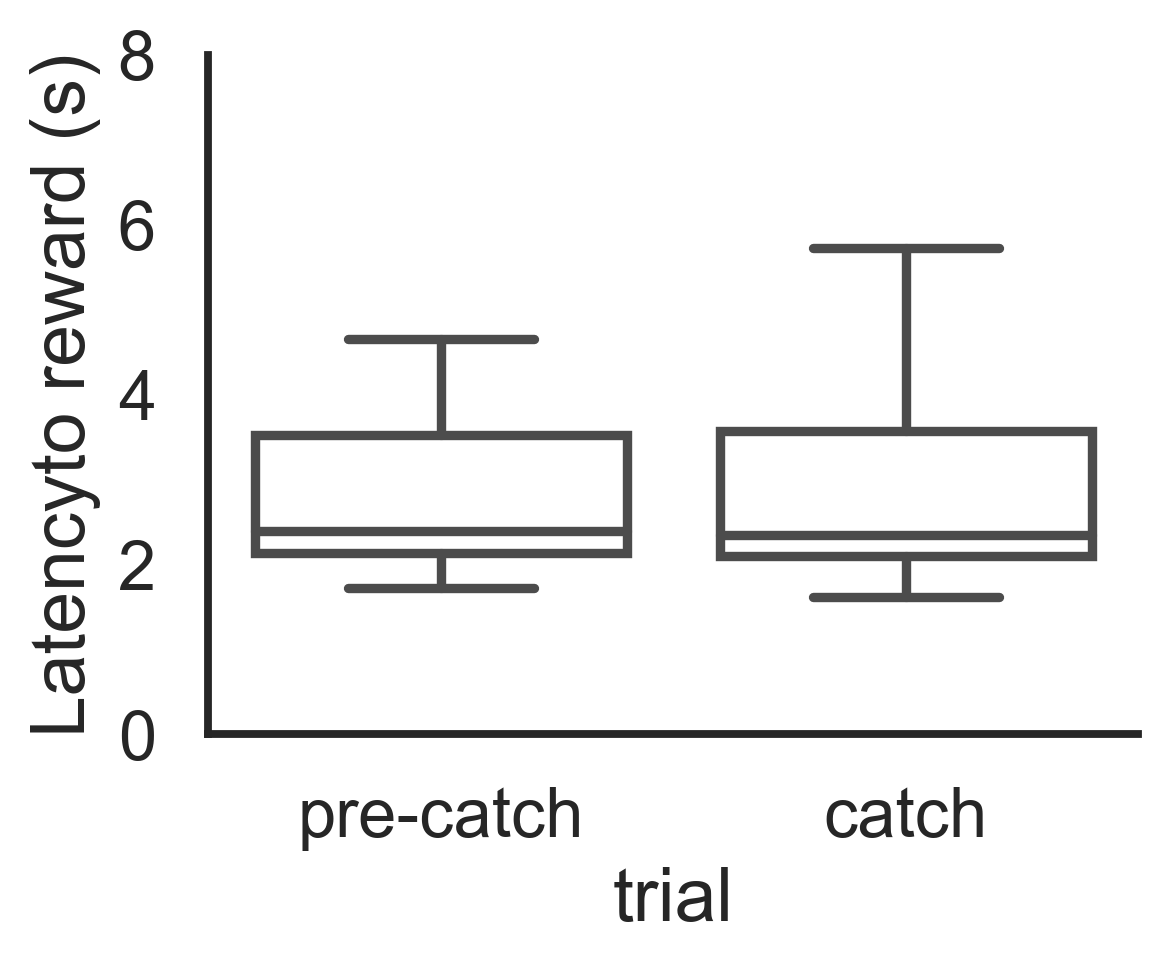

In [13]:
PROPS = {'boxprops':{'facecolor':'none'}}
sns.set(context='talk', style='white')
plt.figure(figsize=(4,3), dpi=300)
g=sns.boxplot(data=subset, x='trial', y='latency_to_rw_s', **PROPS,
             fliersize=0)

g.set(xlim=[-.5,1.5], ylim=[0, 8], xlabel='trial', ylabel='Latencyto reward (s)',
     xticklabels=['pre-catch', 'catch'], yticks=range(0,10,2))
sns.despine()
#Save figure as svg
plt.savefig('latency_to_rw_in_sample_runs.svg')

,statistic,p,kurtosis,skewness
-1,0.565056,1.055630e-10,8.183144,2.842828
0,0.714562,2.422106e-08,5.640588,2.255401


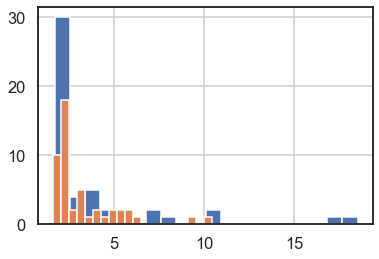

In [20]:
results=pd.DataFrame()
for i in [-1,0]:
    
    group=subset.loc[subset.trial==i, 'latency_to_rw_s']
        
    stat, p = shapiro(group)
    results.loc[i, 'statistic']=stat
    results.loc[i, 'p']=p
    results.loc[i,'kurtosis']=group.kurt()
    results.loc[i,'skewness']=group.skew()
    group.hist(bins=20)
results

In [7]:
pre_catch=subset.loc[subset.trial==-1, 'latency_to_rw_s']
catch= subset.loc[subset.trial==0, 'latency_to_rw_s']

wilcoxon(pre_catch, catch)

WilcoxonResult(statistic=568.0, pvalue=0.8374687993907659)